In [1]:
import numpy as np
import upsilon
import pylab as pl
upsilon.test_predict()

-------------------------------
* WARNING: No pyFFTW detected *
-------------------------------


2021-03-05 11:02:41,463 INFO - Read a light curve
2021-03-05 11:02:41,471 INFO -    Before sigma-clipping: 551 data points
2021-03-05 11:02:41,473 INFO -    After sigma-clipping: 551 data points
2021-03-05 11:02:42,078 INFO - Feature extracting time: 0.6034 seconds
2021-03-05 11:02:42,079 INFO - Extracted features. 16 of these, marked with (+) are used to predict a class:
2021-03-05 11:02:42,079 INFO -    (+) amplitude: 0.097430
2021-03-05 11:02:42,081 INFO -    (-) cusum: 0.070156
2021-03-05 11:02:42,082 INFO -    (-) eta: 2.428789
2021-03-05 11:02:42,083 INFO -    (+) hl_amp_ratio: 0.703306
2021-03-05 11:02:42,084 INFO -    (+) kurtosis: -1.197611
2021-03-05 11:02:42,085 INFO -    (-) n_points: 551
2021-03-05 11:02:42,086 INFO -    (+) period: 4.190441
2021-03-05 11:02:42,087 INFO -    (-) period_SNR: 148.150908
2021-03-05 11:02:42,088 INFO -    (-) period_log10FAP: -99.703013
2021-03-05 11:02:42,089 INFO -    (-) period_uncertainty: 0.007102
2021-03-05 11:02:42,092 INFO -    (+) pha

'label:RRL_ab prob:0.51 flag:1'

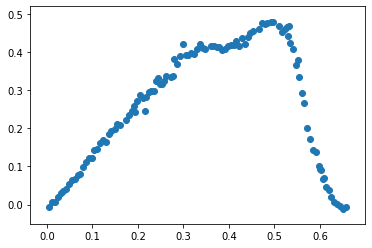

In [50]:
data = np.genfromtxt('data_150536_22075_0.csv',delimiter=',')
period = .657
data = data[:int(len(data)/2)]*pl.array([period,1,1])
rf_model = upsilon.load_rf_model()
efeat = upsilon.ExtractFeatures(data[:,0],data[:,1],data[:,2])
efeat.run()
feats = efeat.get_features()
rf_model = upsilon.load_rf_model()
label, probability, flag = upsilon.predict(rf_model, feats)
display('label:{} prob:{} flag:{}'.format(label, probability, flag))
pl.scatter(data[:,0],data[:,1])

'label:RRL_c prob:0.61 flag:1'

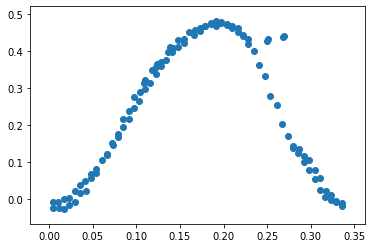

In [54]:
data = np.genfromtxt('data_150537_4644_0.csv',delimiter=',')
period = .337
data = data[:int(len(data)/2)]*pl.array([period,1,1])


C:\Users\kylem\Anaconda3\lib\site-packages\upsilon\extract_features\extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)


'label:CEPH_Other prob:0.42 flag:1'

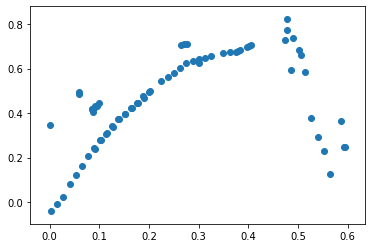

In [51]:
data = np.genfromtxt('data_150023_1179_0.csv',delimiter=',')
period = .598
data = data[:int(len(data)/2)]*pl.array([period,1,1])
rf_model = upsilon.load_rf_model()
efeat = upsilon.ExtractFeatures(data[:,0],data[:,1],data[:,2])
efeat.run()
feats = efeat.get_features()
rf_model = upsilon.load_rf_model()
label, probability, flag = upsilon.predict(rf_model, feats)
display('label:{} prob:{} flag:{}'.format(label, probability, flag))
pl.scatter(data[:,0],data[:,1])

C:\Users\kylem\Anaconda3\lib\site-packages\upsilon\extract_features\extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)


'label:CEPH_Other prob:0.42 flag:1'

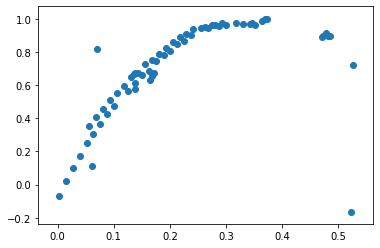

In [56]:
data = np.genfromtxt('data_151047_5422_0.csv',delimiter=',')
period = .533
data = data[:int(len(data)/2)]*pl.array([period,1,1])
rf_model = upsilon.load_rf_model()
efeat = upsilon.ExtractFeatures(data[:,0],data[:,1],data[:,2])
efeat.run()
feats = efeat.get_features()
rf_model = upsilon.load_rf_model()
label, probability, flag = upsilon.predict(rf_model, feats)
display('label:{} prob:{} flag:{}'.format(label, probability, flag))
pl.scatter(data[:,0],data[:,1])

'label:RRL_ab prob:0.73 flag:0'

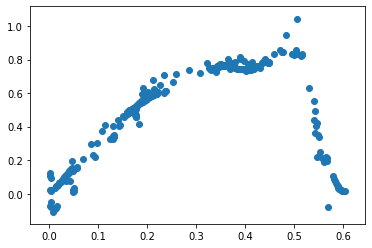

In [39]:
data = np.genfromtxt('ltcrvs/data_93142_19513_0.csv',delimiter=',')
period = .605
data = data[:int(len(data)/2)]*pl.array([period,1,1])
rf_model = upsilon.load_rf_model()
efeat = upsilon.ExtractFeatures(data[:,0],data[:,1],data[:,2])
efeat.run()
feats = efeat.get_features()
rf_model = upsilon.load_rf_model()
label, probability, flag = upsilon.predict(rf_model, feats)
display('label:{} prob:{} flag:{}'.format(label, probability, flag))
pl.scatter(data[:,0],data[:,1])

C:\Users\kylem\Anaconda3\lib\site-packages\upsilon\extract_features\extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)


'label:EB_EC prob:0.57 flag:1'

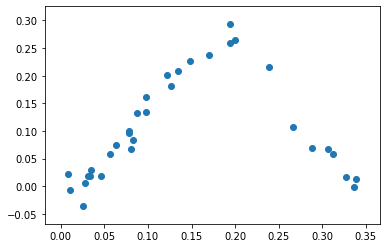

In [44]:
data = np.genfromtxt('ltcrvs/data_147051_5319_2.csv',delimiter=',')
period = .355
data = data[:int(len(data)/2)]*pl.array([period,1,1])
rf_model = upsilon.load_rf_model()
efeat = upsilon.ExtractFeatures(data[:,0],data[:,1],data[:,2])
efeat.run()
feats = efeat.get_features()
rf_model = upsilon.load_rf_model()
label, probability, flag = upsilon.predict(rf_model, feats)
display('label:{} prob:{} flag:{}'.format(label, probability, flag))
pl.scatter(data[:,0],data[:,1])

'label:RRL_ab prob:0.75 flag:0'

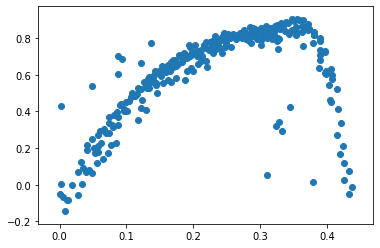

In [41]:
data = np.genfromtxt('ltcrvs/data_146570_154526_1.csv',delimiter=',')
period = .442
data = data[:int(len(data)/2)]*pl.array([period,1,1])
rf_model = upsilon.load_rf_model()
efeat = upsilon.ExtractFeatures(data[:,0],data[:,1],data[:,2])
efeat.run()
feats = efeat.get_features()
rf_model = upsilon.load_rf_model()
label, probability, flag = upsilon.predict(rf_model, feats)
display('label:{} prob:{} flag:{}'.format(label, probability, flag))
pl.scatter(data[:,0],data[:,1])

C:\Users\kylem\Anaconda3\lib\site-packages\upsilon\extract_features\extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)


'label:RRL_ab prob:0.9 flag:1'

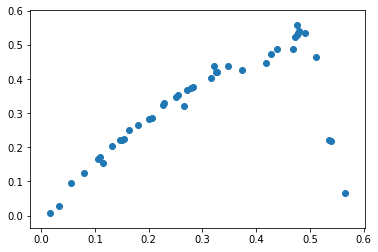

In [48]:
data = np.genfromtxt('ltcrvs/data_147051_64629_1.csv',delimiter=',')
period = .581
data = data[:int(len(data)/2)]*pl.array([period,1,1])
rf_model = upsilon.load_rf_model()
efeat = upsilon.ExtractFeatures(data[:,0],data[:,1],data[:,2])
efeat.run()
feats = efeat.get_features()
rf_model = upsilon.load_rf_model()
label, probability, flag = upsilon.predict(rf_model, feats)
display('label:{} prob:{} flag:{}'.format(label, probability, flag))
pl.scatter(data[:,0],data[:,1])

'label:EB_EC prob:0.78 flag:0'

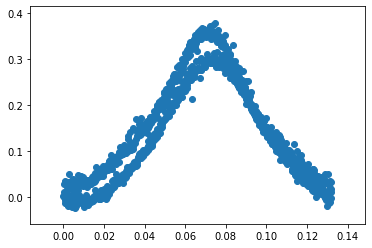

In [42]:
data = np.genfromtxt('ltcrvs/data_101313_10442_0.csv',delimiter=',')
period = .132
data = data[:int(len(data)/2)]*pl.array([period,1,1])
rf_model = upsilon.load_rf_model()
efeat = upsilon.ExtractFeatures(data[:,0],data[:,1],data[:,2])
efeat.run()
feats = efeat.get_features()
rf_model = upsilon.load_rf_model()
label, probability, flag = upsilon.predict(rf_model, feats)
display('label:{} prob:{} flag:{}'.format(label, probability, flag))
pl.scatter(data[:,0],data[:,1])